In [178]:
import pandas as pd
import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

## Initials:

### pd.Timestamp()

In [3]:
timestamp = pd.Timestamp(datetime(2021,12,31))
timestamp2 = pd.Timestamp("2021-12-31")

timestamp == timestamp2

True

In [6]:
print(timestamp.year)
print(timestamp.day_name())

2021
Friday


### pd.Period()

- Always has a frequency

In [7]:
period = pd.Period("2021-07")
period

Period('2021-07', 'M')

In [9]:
period.asfreq("D")

Period('2021-07-31', 'D')

In [11]:
per_stamp = period.to_timestamp()
per_stamp

Timestamp('2021-07-01 00:00:00')

In [12]:
per_back = per_stamp.to_period("M")
per_back

Period('2021-07', 'M')

In [14]:
print(period)
period + 2

2021-07


Period('2021-09', 'M')

### pd.date_range()

- start, end, periods, freq
- default is DAILY: "D"

In [17]:
index = pd.date_range(start = "2017-1-1", periods = 12, freq = "M")
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

### pd.DatetimeIndex & pd.PeriodIndex

- pd.DatetimeIndex: sequence of timestamp objects with frequency info

In [18]:
index.to_period("M")

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

In [19]:
index.to_period("D")

PeriodIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
             '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
             '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
            dtype='period[D]', freq='D')

### pd.DataFrame with pd.DatetimeIndex

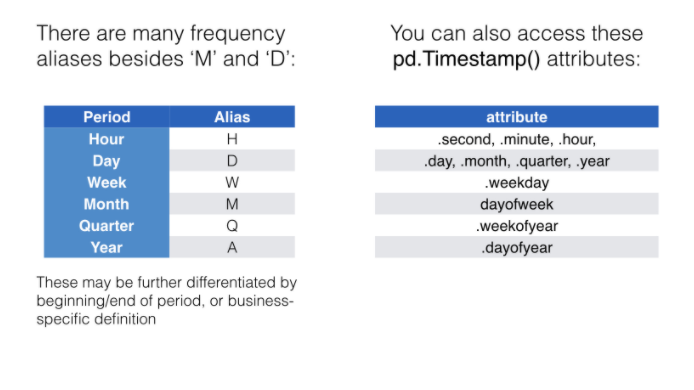

In [28]:
Image("./Image/frequency.png")

In [25]:
pre_data = np.random.random(size = (12,2))
data = pd.DataFrame(data = pre_data, index = index)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes
None


,0,1
2017-01-31,0.568822,0.134508
2017-02-28,0.265366,0.783813
2017-03-31,0.977095,0.678732
2017-04-30,0.494922,0.874672
2017-05-31,0.123162,0.969994
2017-06-30,0.666260,0.636193
2017-07-31,0.322174,0.303653
2017-08-31,0.225817,0.862690
2017-09-30,0.881926,0.675041
2017-10-31,0.507574,0.539308


## Indexing & Resampling:

### pd.to_datetime()

- Parsing String into datetime64

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


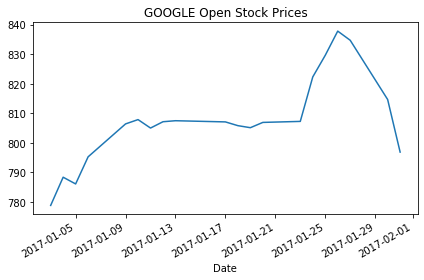

In [14]:
google = pd.read_csv("google.csv")

google.Date = pd.to_datetime(google.Date)
google.set_index("Date", inplace = True)
display(google.head())

google.Open.plot(title = "GOOGLE Open Stock Prices")
plt.tight_layout(); plt.show()

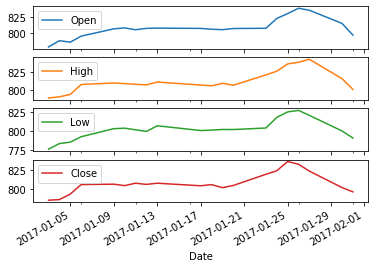

In [24]:
google.plot(subplots = True); plt.show()

### Partial String Indexing:

- Whilst SLICING, DATERANGE INCLUDES THE END SLICE !!!

In [19]:
google["2017"].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [21]:
google["2017-1-13": "2017-1-19"].head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"
2017-01-18,805.81,806.21,800.99,806.07,"1,294,400"
2017-01-19,805.12,809.48,801.80,802.17,"919,300"


### Adding frequency info:

- Depending on the frequency type added, new data might be created or existing data might be aggregated...

In [23]:
google.asfreq("D").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2017-01-03 to 2017-01-31
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


## Lags - Changes:

### shift()

In [29]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)

In [31]:
google["shifted"] = google.price.shift()
google["lagged"] = google.price.shift(periods = -1)
google.head()

,price,shifted,lagged
Date,,,
2017-01-03,778.81,NaN,788.36
2017-01-04,788.36,778.81,786.08
2017-01-05,786.08,788.36,795.26
2017-01-06,795.26,786.08,806.40
2017-01-09,806.40,795.26,807.86


In [32]:
google["change"] = google.price.div(google.shifted)
google.head()

,price,shifted,lagged,change
Date,,,,
2017-01-03,778.81,NaN,788.36,NaN
2017-01-04,788.36,778.81,786.08,1.012262
2017-01-05,786.08,788.36,795.26,0.997108
2017-01-06,795.26,786.08,806.40,1.011678
2017-01-09,806.40,795.26,807.86,1.014008


In [35]:
# .sub() subtracts
# .mul() multiplies
# .div() divides
# .add() adds

google["return"] = google.change.sub(1).mul(100)
google.head()

,price,shifted,lagged,change,return
Date,,,,,
2017-01-03,778.81,NaN,788.36,NaN,NaN
2017-01-04,788.36,778.81,786.08,1.012262,1.226230
2017-01-05,786.08,788.36,795.26,0.997108,-0.289208
2017-01-06,795.26,786.08,806.40,1.011678,1.167820
2017-01-09,806.40,795.26,807.86,1.014008,1.400800


### diff()

In [ ]:
google["diff"] = google.price.diff()

### pct_change()

In [38]:
google["pct_change"] = google.price.pct_change().mul(100)
google.head()

,price,shifted,lagged,change,return,pct_change
Date,,,,,,
2017-01-03,778.81,NaN,788.36,NaN,NaN,NaN
2017-01-04,788.36,778.81,786.08,1.012262,1.226230,1.226230
2017-01-05,786.08,788.36,795.26,0.997108,-0.289208,-0.289208
2017-01-06,795.26,786.08,806.40,1.011678,1.167820,1.167820
2017-01-09,806.40,795.26,807.86,1.014008,1.400800,1.400800


In [40]:
google["return_3d"] = google.price.pct_change(periods = 3).mul(100)
google.head()

,price,shifted,lagged,change,return,pct_change,return_3d
Date,,,,,,,
2017-01-03,778.81,NaN,788.36,NaN,NaN,NaN,NaN
2017-01-04,788.36,778.81,786.08,1.012262,1.226230,1.226230,NaN
2017-01-05,786.08,788.36,795.26,0.997108,-0.289208,-0.289208,NaN
2017-01-06,795.26,786.08,806.40,1.011678,1.167820,1.167820,2.112197
2017-01-09,806.40,795.26,807.86,1.014008,1.400800,1.400800,2.288295


## Comparing Time-Series Growth Rates:

### Normalizing a Time-Series:

In [41]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)

778.81
Date
2017-01-03    100.000000
2017-01-04    101.226230
2017-01-05    100.933475
2017-01-06    102.112197
2017-01-09    103.542584
2017-01-10    103.730050
2017-01-11    103.362823
2017-01-12    103.637601
2017-01-13    103.681257
2017-01-17    103.629897
2017-01-18    103.466828
2017-01-19    103.378231
2017-01-20    103.608069
2017-01-23    103.651725
2017-01-24    105.584160
2017-01-25    106.524056
2017-01-26    107.575660
2017-01-27    107.177617
2017-01-30    104.603177
2017-01-31    102.317638
Name: price, dtype: float64


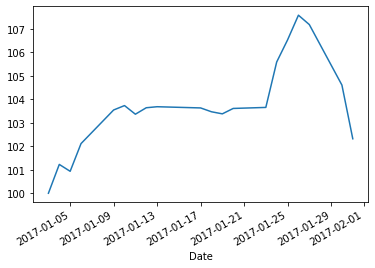

In [45]:
first_price = google.price.iloc[0]
print(first_price)

normalized = google.price.div(first_price).mul(100)
print(normalized)

normalized.plot()

### Normalize Multiple Series:

In [47]:
google

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [50]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


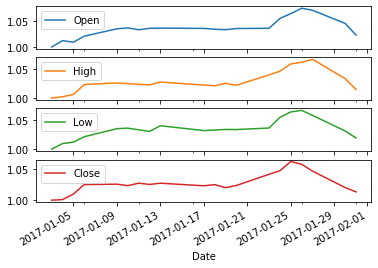

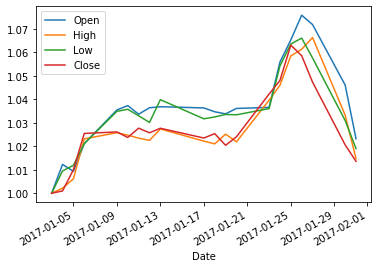

In [54]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")
google.drop(columns = ["Volume"], axis = 1, inplace = True)

normalized = google.div(google.iloc[0])
normalized.plot(subplots = True); plt.show()

normalized.plot(); plt.show()

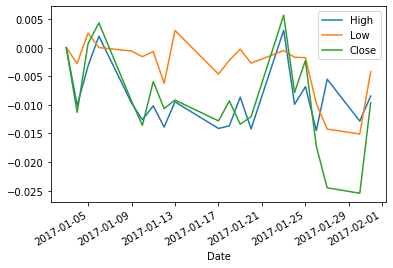

In [56]:
cols = ["High", "Low", "Close"]
diff = normalized[cols].sub(normalized["Open"], axis = 0)

diff.plot(); plt.show()

## Resampling:

In [57]:
dates = pd.date_range(start = "2016", periods = 4, freq = "Q")
data = range(1,5)

quarterly = pd.Series(data = data, index = dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

### UPSAMPLING: quarter -> month

### asfreq()

In [58]:
monthly = quarterly.asfreq("M")
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [59]:
monthly = monthly.to_frame("baseline")
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


### asfreq(method, fill_value)

In [60]:
monthly["ffill"] = quarterly.asfreq("M", method = "ffill")
monthly["bfill"] = quarterly.asfreq("M", method = "bfill")
monthly["value"] = quarterly.asfreq("M", fill_value = 0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


### reindex()

- method, fill_value can be used as well

In [62]:
new_dates = pd.date_range(start = "2016", periods = 12, freq = "M")
quarterly.reindex(new_dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### resample()

- like GROUPBY()
- return data only when calling another method

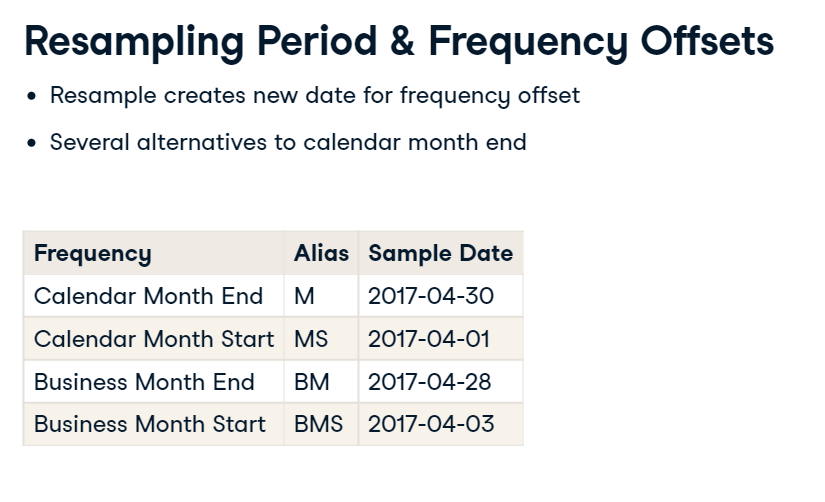

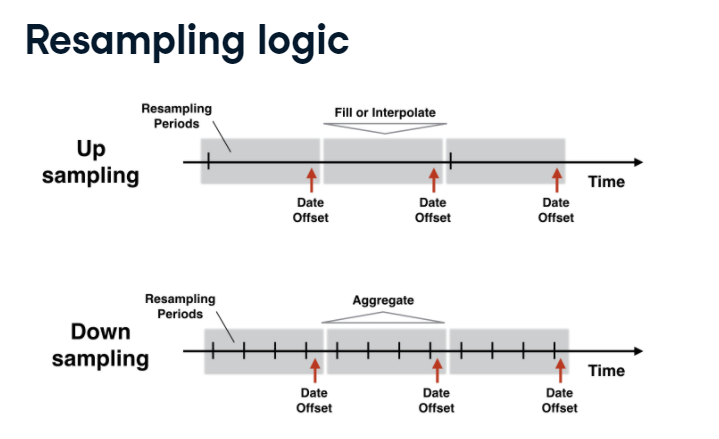

In [65]:
display(Image("./Image/resample.png"))
display(Image("./Image/resample_logic.png"))

In [110]:
gdp = pd.read_csv("gdp.csv").set_index("Title") # , parse_dates = ["Date"], index_col = "Date"
gdp = gdp.loc["1946 Q1"::].rename(columns = {"Income based: Gross value added at factor cost: CP SA £m": "gdp"})["gdp"]

gdp.index = [a.replace(" ", "-") for a in gdp.index]
gdp.index = pd.PeriodIndex(gdp.index, freq = "Q")

gdp = pd.DataFrame(gdp)
gdp["gdp"] = gdp["gdp"].astype("float")
gdp

,gdp
1946Q1,NaN
1946Q2,NaN
1946Q3,NaN
1946Q4,NaN
1947Q1,NaN
...,...
2020Q2,486246.0
2020Q3,507281.0
2020Q4,510573.0
2021Q1,519816.0


In [113]:
gdp1 = gdp.resample("M").ffill().add_suffix("_ffill")
gdp1

,gdp_ffill
1946-01,NaN
1946-02,NaN
1946-03,NaN
1946-04,NaN
1946-05,NaN
...,...
2021-02,519816.0
2021-03,519816.0
2021-04,525624.0
2021-05,525624.0


In [114]:
gdp2 = gdp.resample("M").interpolate().add_suffix("_inter")
gdp2

,gdp_inter
1946-01,NaN
1946-02,NaN
1946-03,NaN
1946-04,NaN
1946-05,NaN
...,...
2021-02,521752.0
2021-03,523688.0
2021-04,525624.0
2021-05,525624.0


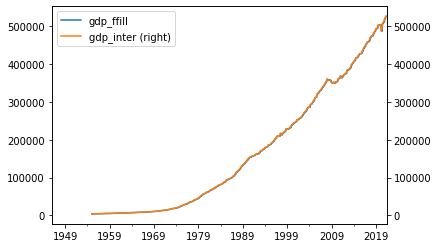

In [118]:
gdp_concat = pd.concat([gdp1, gdp2], axis = 1)
gdp_concat.plot(secondary_y = "gdp_inter"); plt.show()

## Downsampling & Aggregation:

In [123]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)

In [126]:
display(google.resample("W").mean())
display(google.resample("W").median())

,price
Date,
2017-01-08,787.1275
2017-01-15,806.7760
2017-01-22,806.2300
2017-01-29,826.3380
2017-02-05,805.7600


,price
Date,
2017-01-08,787.22
2017-01-15,807.14
2017-01-22,806.36
2017-01-29,829.62
2017-02-05,805.76


In [128]:
google.resample("W").agg(["mean", "median", "sum"])

price                 
                mean  median      sum
Date                                 
2017-01-08  787.1275  787.22  3148.51
2017-01-15  806.7760  807.14  4033.88
2017-01-22  806.2300  806.36  3224.92
2017-01-29  826.3380  829.62  4131.69
2017-02-05  805.7600  805.76  1611.52

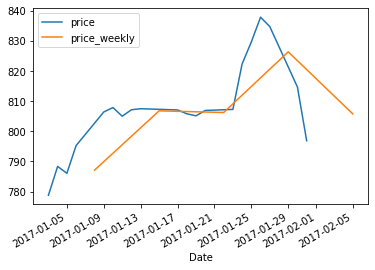

In [129]:
ax = google.plot()

weekly = google.resample("W").mean().add_suffix("_weekly")
weekly.plot(ax = ax)

plt.show()

## Window Functions:

- 1. Same Size
- 2. Expanding

### rolling(window =)

In [141]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)
google.head()

,price
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


In [143]:
google.rolling(window = 7).mean()

,price
Date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
2017-01-10,NaN
2017-01-11,795.395714
2017-01-12,799.442857
2017-01-13,802.174286


In [140]:
google.rolling(window = 7, min_periods = 1).mean() 

,price
Date,
2017-01-03,778.810000
2017-01-04,783.585000
2017-01-05,784.416667
2017-01-06,787.127500
2017-01-09,790.982000
2017-01-10,793.795000
2017-01-11,795.395714
2017-01-12,799.442857
2017-01-13,802.174286


In [138]:
google.rolling(window = "7D").mean()

,price
Date,
2017-01-03,778.810000
2017-01-04,783.585000
2017-01-05,784.416667
2017-01-06,787.127500
2017-01-09,790.982000
2017-01-10,796.792000
2017-01-11,800.120000
2017-01-12,804.332000
2017-01-13,806.776000


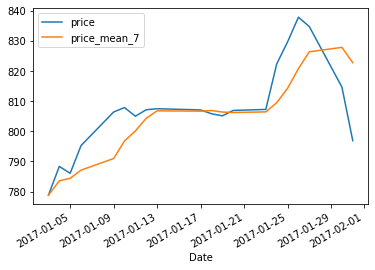

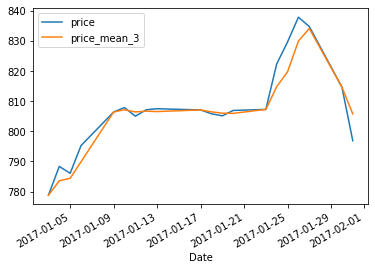

In [145]:
r7 = google.rolling(window = "7D").mean()
google.join(r7.add_suffix("_mean_7")).plot(); plt.show()

r3 = google.rolling(window = "3D").mean()
google.join(r3.add_suffix("_mean_3")).plot(); plt.show()

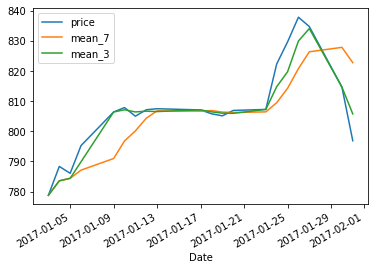

In [146]:
google["mean_7"] = r7
google["mean_3"] = r3

google.plot(); plt.show()

In [150]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)
google.head()

,price
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


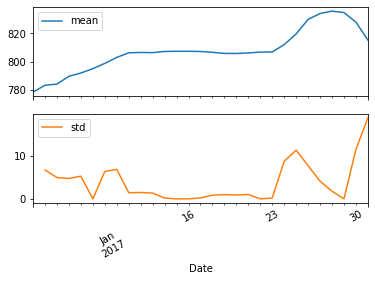

In [153]:
r = google.resample("D").ffill().price.rolling(window = "3D").agg(["mean", "std"])
r.plot(subplots = True); plt.show()

### Rolling & Quantile Analysis:

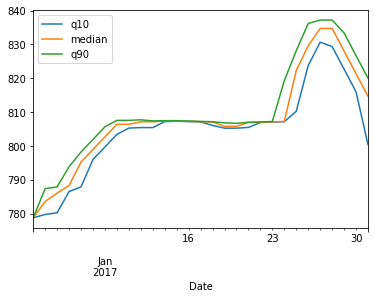

In [157]:
r = google.resample("D").interpolate().price.rolling(window = "3D")
q10 = r.quantile(0.1).to_frame("q10")
median = r.median().to_frame("median")
q90 = r.quantile(0.9).to_frame("q90")

pd.concat([q10, median, q90], axis = 1).plot(); plt.show()

### Expanding Windows:

- useful for running rate of return, running min/max...

### expanding()

In [160]:
df = pd.DataFrame({"data": range(5)})
df["expanding_sum"] = df.data.expanding().sum()
df["cum_sum"] = df.data.cumsum()

df.head()

,data,expanding_sum,cum_sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [161]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)
google.head()

,price
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


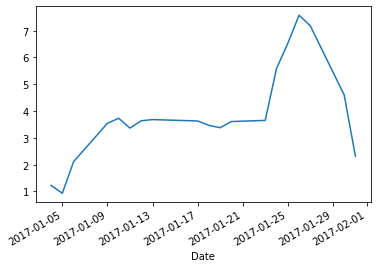

In [162]:
pr = google.price.pct_change()
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1).mul(100)

cumulative_return.plot(); plt.show()

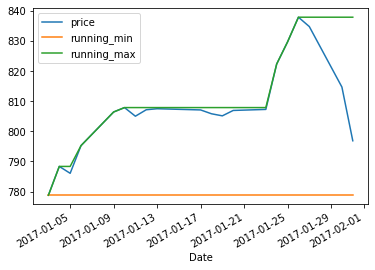

In [164]:
google["running_min"] = google.price.expanding().min()
google["running_max"] = google.price.expanding().max()

google.plot(); plt.show()

In [166]:
def multi_period_return(period_returns: np.array):
    return np.prod(period_returns - 1) - 1

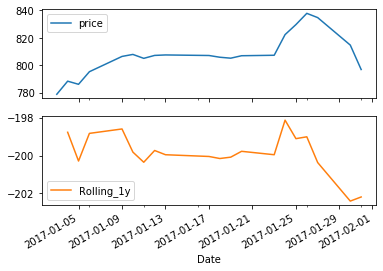

In [174]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["High", "Low", "Close", "Volume"], 
            axis = 1, 
            inplace = True)

google.rename(columns = {"Open": "price"}, inplace = True)
google.head()


pr = google.price.pct_change()
r = pr.rolling("D").apply(multi_period_return)
google["Rolling_1y"] = r.mul(100)

google.plot(subplots = True); plt.show()

### cumsum(), cumprod(), cummin(), cummax()

- Self explanatory names...

## Random Walks

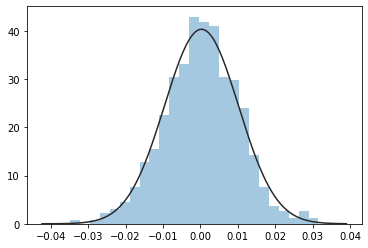

In [181]:
random_returns = normal(loc = 0, scale = 0.01, size = 1000)
sns.distplot(random_returns, fit = norm, kde = False); plt.show()

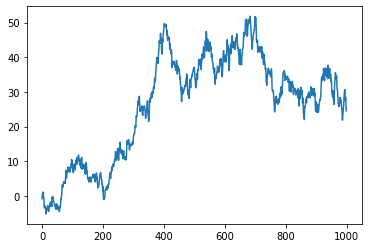

In [182]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)

random_prices.mul(100).plot(); plt.show()

## Relationship & Correlations:

In [183]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date")

google.drop(columns = ["Volume"], axis = 1, inplace = True)

google.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,778.81,789.63,775.80,786.14
2017-01-04,788.36,791.34,783.16,786.90
2017-01-05,786.08,794.48,785.02,794.02
2017-01-06,795.26,807.90,792.20,806.15
2017-01-09,806.40,809.97,802.83,806.65


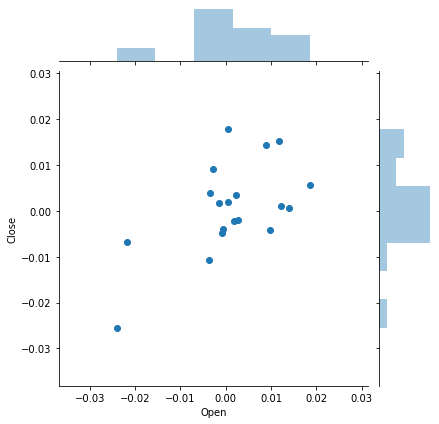

In [184]:
daily_returns = google.pct_change()

sns.jointplot(x = "Open", y = "Close", data = daily_returns); plt.show()

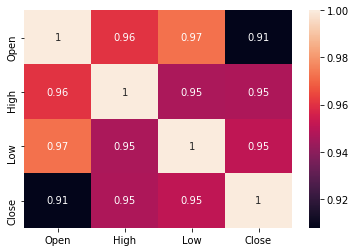

In [186]:
corr = google.corr()
sns.heatmap(corr, annot = True); plt.show()

## Excel Write:

In [193]:
google.index = google.index.date

with pd.ExcelWriter("google_written.xlsx") as writer:
    corr.to_excel(excel_writer = writer, sheet_name = "correlation")
    google.to_excel(excel_writer = writer, sheet_name = "prices")
    google.pct_change().to_excel(excel_writer = writer, sheet_name = "returns")